# How to Use the Goodreads Scraper

By [Melanie Walsh](https://melaniewalsh.org/) and [Maria Antoniak](https://maria-antoniak.github.io/)

This Jupyter notebook will walk you through how to collect Goodreads reviews and Goodreads book metadata (# reviews, # ratings, shelves, etc.) with our [Goodreads Scraper](https://github.com/maria-antoniak/goodreads-scraper) Python scripts.

## Download the `goodreads-scraper` GitHub Repository

First, you need to download the `goodreads-scraper` GitHub repository (which includes this Jupyter notebook). You can either clone the repository with git:

In [1]:
!git clone https://github.com/maria-antoniak/goodreads-scraper.git

Cloning into 'goodreads-scraper'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 129 (delta 64), reused 53 (delta 22), pack-reused 0
Receiving objects: 100% (129/129), 31.45 KiB | 7.86 MiB/s, done.
Resolving deltas: 100% (64/64), done.


Or you can download the repository as a zip file by clicking the following link:  
https://github.com/maria-antoniak/goodreads-scraper/archive/master.zip

If you haven't already, move into the `/goodreads-scraper` directory:

In [415]:
cd goodreads-scraper/

/Users/melaniewalsh/Goodreads-Project/notebooks/goodreads-scraper


## Install required Python packages

In [18]:
!pip install -r requirements.txt

## Inspect Goodreads Book ID File

To collect Goodreads data about particular books, you need to create a plain text file with the books' corresponding Goodreads IDs.

Goodreads IDs can be found at the end of a book's Goodreads URL. For example, the book ID for *Little Women* — https://www.goodreads.com/book/show/1934.Little_Women — is `1934.Little_Women`.

You can inspect the the sample book ID file included in the repository as an example:

In [419]:
!cat goodreads_classics_sample.txt

1885.Pride_and_Prejudice
2657.To_Kill_a_Mockingbird
4671.The_Great_Gatsby
10210.Jane_Eyre
1371.The_Iliad
6185.Wuthering_Heights
5107.The_Catcher_in_the_Rye
11337.The_Bluest_Eye
320.One_Hundred_Years_of_Solitude
36529.Narrative_of_the_Life_of_Frederick_Douglass
1934.Little_Women
12296.The_Scarlet_Letter
18423.The_Left_Hand_of_Darkness
14942.Mrs_Dalloway
38447.The_Handmaid_s_Tale

# Collect Goodreads Book Metadata
## # ratings, # reviews, average rating, shelves, lists etc.

## Make new directory for book metadata

Make a new directory to output the book metadata 

In [417]:
!mkdir classic_book_metadata

## Run book metadata collection script

Below we're running the `get_books.py` script and directing it to output files to `/classic_book_metadata`. We're also setting the file format of the aggregated book metadata as a CSV file (in addition to a JSON file).

In [429]:
!python get_books.py --book_ids_path goodreads_classics_sample.txt --output_directory_path classic_book_metadata --format csv

2020-10-15 12:26:16.651934 get_books.py: Scraping 1885.Pride_and_Prejudice...
2020-10-15 12:26:16.651985 get_books.py: #1 out of 15 books
2020-10-15 12:27:07.449440 get_books.py: Scraping 2657.To_Kill_a_Mockingbird...
2020-10-15 12:27:07.449466 get_books.py: #2 out of 15 books
2020-10-15 12:27:56.722658 get_books.py: Scraping 4671.The_Great_Gatsby...
2020-10-15 12:27:56.722674 get_books.py: #3 out of 15 books
2020-10-15 12:28:49.392396 get_books.py: Scraping 10210.Jane_Eyre...
2020-10-15 12:28:49.392417 get_books.py: #4 out of 15 books
2020-10-15 12:29:38.987517 get_books.py: Scraping 1371.The_Iliad...
2020-10-15 12:29:38.987533 get_books.py: #5 out of 15 books
2020-10-15 12:30:29.021774 get_books.py: Scraping 6185.Wuthering_Heights...
2020-10-15 12:30:29.021790 get_books.py: #6 out of 15 books
2020-10-15 12:31:17.578016 get_books.py: Scraping 5107.The_Catcher_in_the_Rye...
2020-10-15 12:31:17.578033 get_books.py: #7 out of 15 books
2020-10-15 12:32:06.722567 get_books.py: Scraping 113

Let's import Pandas so we can read in the aggregated CSV and see what the data looks like:

In [4]:
import pandas as pd

In [5]:
metadata = pd.read_csv("classic_book_metadata/all_books.csv")
metadata

,book_id_title,book_id,book_title,isbn,isbn13,year_first_published,author,num_pages,genres,shelves,lists,num_ratings,num_reviews,average_rating,rating_distribution
0,320.One_Hundred_Years_of_Solitude,320,One Hundred Years of Solitude,8420471836,9788420471839,1967,Gabriel García Márquez,417,"['Fiction', 'Classics', 'Magical Realism', 'Li...","{'to-read': 660690, 'currently-reading': 34629...","{'Best': 80020, 'Books': 7, 'Favorite': 184, '...",751336,30615,4.08,"{'5 Stars': 360307, '4 Stars': 201622, '3 Star..."
1,4671.The_Great_Gatsby,4671,The Great Gatsby,0684801523,9780684801520,1925,F. Scott Fitzgerald,200,"['Classics', 'Fiction', 'Academic > School', '...","{'to-read': 1065506, 'classics': 43826, 'curre...","{'Books': 34, 'Best': 111, '100': 26, '1001': ...",3765257,67035,3.92,"{'5 Stars': 1341705, '4 Stars': 1263237, '3 St..."
2,38447.The_Handmaid_s_Tale,38447,The Handmaid's Tale,isbn not found,isbn13 not found,1985,Margaret Atwood,314,"['Fiction', 'Classics', 'Science Fiction > Dys...","{'to-read': 847109, 'currently-reading': 13201...","{'Best': 71, 'Books': 3429, '100': 71, 'The': ...",1453397,70541,4.11,"{'5 Stars': 614053, '4 Stars': 515080, '3 Star..."
3,1885.Pride_and_Prejudice,1885,Pride and Prejudice,0553213105,9780553213102,1813,Jane Austen,279,"['Classics', 'Fiction', 'Romance', 'Historical...","{'to-read': 1227780, 'currently-reading': 1358...","{'Best': 82, 'Books': 229, 'All': 285, '100': ...",2988238,67087,4.26,"{'5 Stars': 1611736, '4 Stars': 814196, '3 Sta..."
4,18423.The_Left_Hand_of_Darkness,18423,The Left Hand of Darkness,0441478123,9780441478125,1969,Ursula K. Le Guin,304,"['Science Fiction', 'Fiction', 'Fantasy', 'Cla...","{'to-read': 116814, 'currently-reading': 8036,...","{'Best': 6, 'Science': 3, 'Favorite': 41, '100...",119642,9131,4.07,"{'5 Stars': 46515, '4 Stars': 44532, '3 Stars'..."
5,14942.Mrs_Dalloway,14942,Mrs. Dalloway,0156628708,9780156628709,1925,Virginia Woolf,194,"['Classics', 'Fiction', 'Literature', 'Novels'...","{'to-read': 197554, 'currently-reading': 14288...","{'Best': 5, 'The': 19, 'Books': 5, '1001': 528...",222692,9912,3.79,"{'5 Stars': 69055, '4 Stars': 73711, '3 Stars'..."
6,36529.Narrative_of_the_Life_of_Frederick_Douglass,36529,Narrative of the Life of Frederick Douglass,0486284999,9780486284996,1845,Frederick Douglass,158,"['Nonfiction', 'History', 'Classics', 'Biograp...","{'to-read': 89227, 'currently-reading': 4205, ...","{'Books': 299, 'Best': 76, '100': 10275, 'Blac...",93986,4377,4.04,"{'5 Stars': 38536, '4 Stars': 30871, '3 Stars'..."
7,12296.The_Scarlet_Letter,12296,The Scarlet Letter,0679783385,9780679783381,1850,Nathaniel Hawthorne,279,"['Classics', 'Fiction', 'Historical > Historic...","{'to-read': 275850, 'classics': 19898, 'curren...","{'Books': 50, 'Best': 193, '100': 53, 'The': 1...",704758,14822,3.41,"{'5 Stars': 130486, '4 Stars': 209958, '3 Star..."
8,2657.To_Kill_a_Mockingbird,2657,To Kill a Mockingbird,1439550417,9781439550410,1960,Harper Lee,324,"['Classics', 'Fiction', 'Historical > Historic...","{'to-read': 13346, 'currently-reading': 60856,...","{'Books': 338, 'Best': 53, '100': 162, '1001':...",4487646,91126,4.28,"{'5 Stars': 2356364, '4 Stars': 1329450, '3 St..."
9,1371.The_Iliad,1371,The Iliad,0471377589,9780471377580,750,Homer,683,"['Classics', 'Poetry', 'Fiction', 'Fantasy > M...","{'to-read': 1224, 'currently-reading': 16098, ...","{'Books': 28, 'The': 2, 'Big': 7332, 'Best': 2...",351102,7209,3.87,"{'5 Stars': 117275, '4 Stars': 114644, '3 Star..."


Let's plot the total number of Goodreads ratings for each book

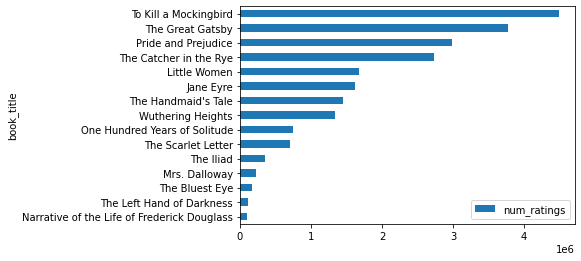

In [11]:
metadata.sort_values(by='num_ratings').plot(x='book_title', y='num_ratings', kind='barh')

# Collect Goodreads Reviews (Chrome)
## full text of review, shelves, date, user name, # likes, etc.

## Make new directory for book reviews

In [13]:
!mkdir classic_book_reviews

## Run Goodreads reviews collection script

Below we're running `get_reviews.py`, setting `--sort_order` to `default` to collect the most liked and most commented on Goodreads reviews, and indicating that the web browser we'd like to use is Chrome.

In [19]:
!python get_reviews.py --book_ids_path goodreads_classics_sample.txt \
--output_directory_path classic_book_reviews --sort_order default --browser chrome 

2020-10-16 15:46:36.115814 get_reviews.py: Scraping 1885.Pride_and_Prejudice...
2020-10-16 15:46:36.116074 get_reviews.py: #1 out of 15 books
Scraped page 1
Scraped page 2
Scraped page 3
Scraped page 4
Scraped page 5
Scraped page 6
Scraped page 7
Scraped page 8
Scraped page 9
Scraped page 10
ERROR: 30 duplicates found! Re-scraping this book.
Scraped page 1
🚨 ElementClickInterceptedException (Likely a pop-up)🚨
🔄 Refreshing Goodreads site and skipping problem page 2🔄
Scraped page 3
Scraped page 4
Scraped page 5
Scraped page 6
Scraped page 7
Scraped page 8
Scraped page 9
Scraped page 10
ERROR: 30 duplicates found! Re-scraping this book.
Scraped page 1
Scraped page 2
Scraped page 3
Scraped page 4
Scraped page 5
Scraped page 6
Scraped page 7
Scraped page 8
Scraped page 9
Scraped page 10
ERROR: 30 duplicates found! Re-scraping this book.
Scraped page 1
Scraped page 2
Scraped page 3
Scraped page 4
Scraped page 5
Scraped page 6
Scraped page 7
Scraped page 8
Scraped page 9
Scraped page 10
2020-

Let's read in the aggregated JSON file with Pandas and see what the data looks like:

In [20]:
reviews_df = pd.read_json('classic_book_reviews/all_reviews.json')
reviews_df

,book_id_title,book_id,book_title,review_url,review_id,date,rating,user_name,user_url,text,num_likes,sort_order,shelves
0,320.One_Hundred_Years_of_Solitude,320,One Hundred Years of Solitude,https://www.goodreads.com/review/show/14889645,14889645,2008-02-08,3,Chris,/user/show/858949-chris,"Revised 28 March 2012Huh? Oh. Oh, man. Wow.I j...",1527,default,[fantasy]
1,320.One_Hundred_Years_of_Solitude,320,One Hundred Years of Solitude,https://www.goodreads.com/review/show/42810714,42810714,2009-01-12,5,Meg,/user/show/1009267-meg,I guarantee that 95% of you will hate this boo...,1833,default,[]
2,320.One_Hundred_Years_of_Solitude,320,One Hundred Years of Solitude,https://www.goodreads.com/review/show/11478967,11478967,2008-01-02,1,Adam,/user/show/735606-adam,So I know that I'm supposed to like this book ...,1342,default,[classics]
3,320.One_Hundred_Years_of_Solitude,320,One Hundred Years of Solitude,https://www.goodreads.com/review/show/977161604,977161604,2014-06-25,5,Lisa,/user/show/32532774-lisa,"""What is your favourite book, mum?"" How many t...",592,default,"[favorites, havanas-en-masse, unforgettable, n..."
4,320.One_Hundred_Years_of_Solitude,320,One Hundred Years of Solitude,https://www.goodreads.com/review/show/24243058,24243058,2008-06-11,1,Laura,/user/show/1040930-laura,More like A Hundred Years of Torture. I read t...,549,default,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4284,1934.Little_Women,1934,Little Women,https://www.goodreads.com/review/show/1689777505,1689777505,2019-12-11,3,Leah,/user/show/9846570-leah,This book is huge! It was originally published...,9,default,[]
4285,1934.Little_Women,1934,Little Women,https://www.goodreads.com/review/show/1407372705,1407372705,2015-10-03,5,Kara Swanson,/user/show/30110097-kara-swanson,What can I say? Its a classic for a reason. Th...,9,default,[magical-classics]
4286,1934.Little_Women,1934,Little Women,https://www.goodreads.com/review/show/1736223734,1736223734,2016-08-22,4,Rosemarie,/user/show/49876976-rosemarie,This charming book is deservedly a classic. Th...,9,default,"[guardian-1000, rosemarie-19th-century-10]"
4287,1934.Little_Women,1934,Little Women,https://www.goodreads.com/review/show/2274554034,2274554034,2018-01-27,5,Rosemary Atwell,/user/show/15847499-rosemary-atwell,A twenty-year revisitation of another of my v...,9,default,[re-reads]


How many Goodreads reviews did we collect for each book?

In [21]:
reviews_df['book_title'].value_counts()

To Kill a Mockingbird                          300
The Iliad                                      300
Wuthering Heights                              300
One Hundred Years of Solitude                  300
The Scarlet Letter                             300
Narrative of the Life of Frederick Douglass    300
The Left Hand of Darkness                      300
The Bluest Eye                                 300
Jane Eyre                                      300
Mrs. Dalloway                                  300
Little Women                                   300
Pride and Prejudice                            300
The Handmaid's Tale                            300
The Catcher in the Rye                         299
The Great Gatsby                                90
Name: book_title, dtype: int64

How many Goodreads reviews did we collect in total?

In [22]:
len(reviews_df)

4289

## Count duplicates

How many duplicate reviews are in this data?

In [ ]:
len(reviews_df[reviews_df[['book_title','text', 'user_name', 'user_url']].duplicated(keep=False)])

Let's examine the duplicates (lots of spam/bots?):

In [24]:
reviews_df[reviews_df[['book_title','text', 'user_name', 'user_url']].duplicated(keep=False)]

,book_id_title,book_id,book_title,review_url,review_id,date,rating,user_name,user_url,text,num_likes,sort_order,shelves
3179,11337.The_Bluest_Eye,11337,The Bluest Eye,https://www.goodreads.com/review/show/3437328601,3437328601,2020-07-11,5,Amanda Hupe,/user/show/11658047-amanda-hupe,"“Certain seeds it will not nurture, certain fr...",9,default,[2020-reads]
3246,11337.The_Bluest_Eye,11337,The Bluest Eye,https://www.goodreads.com/review/show/3420710517,3420710517,2020-07-08,5,Amanda Hupe,/user/show/11658047-amanda-hupe,"“Certain seeds it will not nurture, certain fr...",5,default,[2020-reads]


Drop duplicates

In [27]:
reviews_df[['book_title','text', 'user_name', 'user_url']] = reviews_df[['book_title','text', 'user_name', 'user_url']].drop_duplicates(keep='first')

In [28]:
reviews_df[reviews_df[['book_title','text', 'user_name', 'user_url']].duplicated(keep=False)]

,book_id_title,book_id,book_title,review_url,review_id,date,rating,user_name,user_url,text,num_likes,sort_order,shelves


Output to CSV file

In [30]:
reviews_df.to_csv("all_goodreads_reviews.csv", encoding ='utf-8', index=False)

## Collect Newest Goodreads Reviews (Firefox)

## Make new directory for book reviews

Make new folder for newest Goodreads reviews

In [21]:
!mkdir classic_book_reviews_newest

## Run Goodreads reviews collection script

Below we're running `get_reviews.py`, setting `--sort_order` to `newest` to collect the most recently published Goodreads reviews, indicating that the web browser we'd like to use is Firefox, and setting the file format of the aggregated reviews as a CSV file (in addition to a JSON file).

In [5]:
!python get_reviews.py --book_ids_path goodreads_classics_sample.txt \
--output_directory_path classic_book_reviews_newest --sort_order newest --browser firefox --format csv

2020-10-16 14:26:51.613647 get_reviews.py: Scraping 4671.The_Great_Gatsby...
2020-10-16 14:26:51.613765 get_reviews.py: #3 out of 15 books
Scraped page 1
Scraped page 2
Scraped page 3
Scraped page 4
Scraped page 5
Scraped page 6
Scraped page 7
Scraped page 8
Scraped page 9
Scraped page 10
2020-10-16 14:27:52.671204 get_reviews.py: Scraped ✨300✨ reviews for 4671.The_Great_Gatsby
2020-10-16 14:27:52.683197 get_reviews.py: Scraping 10210.Jane_Eyre...
2020-10-16 14:27:52.683215 get_reviews.py: #4 out of 15 books
🚨 ElementClickInterceptedException 🚨
Refreshing Goodreads site and rescraping book
Scraped page 1
Scraped page 2
Scraped page 3
Scraped page 4
Scraped page 5
Scraped page 6
Scraped page 7
Scraped page 8
Scraped page 9
Scraped page 10
2020-10-16 14:28:59.189851 get_reviews.py: Scraped ✨300✨ reviews for 10210.Jane_Eyre
2020-10-16 14:28:59.212523 get_reviews.py: Scraping 1371.The_Iliad...
2020-10-16 14:28:59.212545 get_reviews.py: #5 out of 15 books
Scraped page 1
Scraped page 2
Scrap

Let's read in the aggregated CSV file with Pandas and see what the data looks like:

In [9]:
newest_reviews = pd.read_csv('classic_book_reviews_newest/all_reviews.csv')

In [11]:
newest_reviews 

,book_id_title,book_id,book_title,review_url,review_id,date,rating,user_name,user_url,text,num_likes,sort_order,shelves
0,320.One_Hundred_Years_of_Solitude,320,One Hundred Years of Solitude,https://www.goodreads.com/review/show/3572683523,3572683523,2020-10-16,4.0,Gitte Hornung,/user/show/63555571-gitte-hornung,Phew this was a long book. At one point I cons...,0,newest,[]
1,320.One_Hundred_Years_of_Solitude,320,One Hundred Years of Solitude,https://www.goodreads.com/review/show/3598284436,3598284436,2020-10-16,5.0,Rob Jacobs,/user/show/114599362-rob-jacobs,Great journey!,0,newest,[]
2,320.One_Hundred_Years_of_Solitude,320,One Hundred Years of Solitude,https://www.goodreads.com/review/show/3582954889,3582954889,2020-10-16,2.0,Rona Karen,/user/show/6864201-rona-karen,Two stars for now. The repetitive names annoye...,0,newest,[]
3,320.One_Hundred_Years_of_Solitude,320,One Hundred Years of Solitude,https://www.goodreads.com/review/show/2122452416,2122452416,2020-10-15,4.0,Emma Pek,/user/show/53126830-emma-pek,The story was timeless and full of excitement....,0,newest,[]
4,320.One_Hundred_Years_of_Solitude,320,One Hundred Years of Solitude,https://www.goodreads.com/review/show/3541262010,3541262010,2020-10-15,4.0,Irini Kallides,/user/show/113080501-irini-kallides,Amazed about the richness of his language and ...,0,newest,['book-club']
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4493,1934.Little_Women,1934,Little Women,https://www.goodreads.com/review/show/3508929611,3508929611,2020-09-14,4.0,Michael,/user/show/108824026-michael,This was a great book despite how hard it was ...,0,newest,[]
4494,1934.Little_Women,1934,Little Women,https://www.goodreads.com/review/show/3486426118,3486426118,2020-09-14,2.0,Deanna,/user/show/43177294-deanna,"Wow that did not live up to the hype, but I be...",0,newest,[]
4495,1934.Little_Women,1934,Little Women,https://www.goodreads.com/review/show/3532663154,3532663154,2020-09-14,2.0,Kelly,/user/show/8545345-kelly,I listened to 'Little Women' as an audiobook a...,0,newest,[]
4496,1934.Little_Women,1934,Little Women,https://www.goodreads.com/review/show/3359606301,3359606301,2020-09-14,2.0,Ashley Brooks,/user/show/17334972-ashley-brooks,Reading this as an adult was a different exper...,0,newest,[]


How many Goodreads reviews did we collect for each book?

In [29]:
newest_reviews['book_title'].value_counts()

To Kill a Mockingbird                          300
The Great Gatsby                               300
Wuthering Heights                              300
One Hundred Years of Solitude                  300
The Scarlet Letter                             300
Narrative of the Life of Frederick Douglass    300
The Left Hand of Darkness                      300
The Bluest Eye                                 300
Jane Eyre                                      300
Mrs. Dalloway                                  300
Little Women                                   300
The Handmaid's Tale                            300
The Catcher in the Rye                         300
The Iliad                                      299
Pride and Prejudice                            299
Name: book_title, dtype: int64

How many Goodreads reviews did we collect in total?

In [34]:
len(newest_reviews)

4498